# Data

In [1]:
!pip install gdown -q

In [ ]:
link = 'https://drive.google.com/file/d/1UpZOf0XlwvB4rKpyZ35iwTA8oWHqDBbR/view?usp=sharing'

In [2]:
!gdown 1UpZOf0XlwvB4rKpyZ35iwTA8oWHqDBbR

Downloading...
From (original): https://drive.google.com/uc?id=1UpZOf0XlwvB4rKpyZ35iwTA8oWHqDBbR
From (redirected): https://drive.google.com/uc?id=1UpZOf0XlwvB4rKpyZ35iwTA8oWHqDBbR&confirm=t&uuid=ffa7becb-88de-4e04-948c-938059da9cb0
To: /content/VinaFood21.zip
100% 2.71G/2.71G [00:38<00:00, 70.5MB/s]


In [3]:
import zipfile

with zipfile.ZipFile('VinaFood21.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [4]:
!echo "Đang tìm và xóa các tệp ẩn..."

# Xóa tệp .DS_Store
!find VinaFood21 -name ".DS_Store" -delete

# Xóa các tệp resource fork (bắt đầu bằng ._)
!find VinaFood21 -name "._*" -delete

# Xóa tệp Thumbs.db
!find VinaFood21 -name "Thumbs.db" -delete

!echo "Đã dọn dẹp xong!"

Đang tìm và xóa các tệp ẩn...
Đã dọn dẹp xong!


In [5]:
import os
from pathlib import Path
from PIL import Image

base_dir = 'VinaFood21'
print(f"Bắt đầu CHUẨN HÓA ảnh trong: {base_dir}...")
print("Quá trình này sẽ mở, chuyển sang RGB và lưu đè lên mọi ảnh.")

processed_count = 0
error_count = 0

for file_path in Path(base_dir).rglob('*'):
    # Chỉ xử lý tệp tin, bỏ qua thư mục
    if file_path.is_file():
        try:
            # Mở ảnh
            img = Image.open(file_path)

            # Chuyển đổi sang RGB (loại bỏ các vấn đề về kênh màu như CMYK, P, LA)
            img_rgb = img.convert('RGB')

            # Lưu đè lên tệp gốc với định dạng JPEG chuẩn
            # (Bạn có thể đổi 'JPEG' thành 'PNG' nếu muốn)
            # setting quality=95 để giữ chất lượng tốt
            img_rgb.save(file_path, format='JPEG', quality=95)

            processed_count += 1
            if processed_count % 500 == 0:
                print(f"Đã xử lý {processed_count} ảnh...")

        except Exception as e:
            # Nếu PIL cũng không mở được, nó chắc chắn là tệp rác
            print(f"--- TỆP LỖI KHÔNG THỂ XỬ LÝ ---")
            print(f"Phát hiện: {file_path}")
            print(f"Lý do: {e}")

            # XÓA NGAY LẬP TỨC
            os.remove(file_path)
            print(f"==> ĐÃ XÓA TỆP: {file_path}")
            print("--------------------")
            error_count += 1

print("\nHoàn tất chuẩn hóa!")
print(f"Đã xử lý và lưu lại {processed_count} ảnh.")
print(f"Đã tìm và xóa {error_count} tệp không phải ảnh.")

Bắt đầu CHUẨN HÓA ảnh trong: VinaFood21...
Quá trình này sẽ mở, chuyển sang RGB và lưu đè lên mọi ảnh.
--- TỆP LỖI KHÔNG THỂ XỬ LÝ ---
Phát hiện: VinaFood21/README.txt
Lý do: cannot identify image file 'VinaFood21/README.txt'
==> ĐÃ XÓA TỆP: VinaFood21/README.txt
--------------------
Đã xử lý 500 ảnh...
Đã xử lý 1000 ảnh...
Đã xử lý 1500 ảnh...
Đã xử lý 2000 ảnh...
Đã xử lý 2500 ảnh...
Đã xử lý 3000 ảnh...
Đã xử lý 3500 ảnh...
Đã xử lý 4000 ảnh...
Đã xử lý 4500 ảnh...
Đã xử lý 5000 ảnh...
Đã xử lý 5500 ảnh...
Đã xử lý 6000 ảnh...
Đã xử lý 6500 ảnh...
Đã xử lý 7000 ảnh...
Đã xử lý 7500 ảnh...
Đã xử lý 8000 ảnh...
Đã xử lý 8500 ảnh...
Đã xử lý 9000 ảnh...


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Đã xử lý 9500 ảnh...
Đã xử lý 10000 ảnh...
Đã xử lý 10500 ảnh...
Đã xử lý 11000 ảnh...
Đã xử lý 11500 ảnh...
Đã xử lý 12000 ảnh...
Đã xử lý 12500 ảnh...
Đã xử lý 13000 ảnh...
Đã xử lý 13500 ảnh...
Đã xử lý 14000 ảnh...
Đã xử lý 14500 ảnh...
Đã xử lý 15000 ảnh...
Đã xử lý 15500 ảnh...
Đã xử lý 16000 ảnh...
Đã xử lý 16500 ảnh...

Hoàn tất chuẩn hóa!
Đã xử lý và lưu lại 16726 ảnh.
Đã tìm và xóa 1 tệp không phải ảnh.


# Model

**LeNet**

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D,
    Flatten, Dense, Dropout, concatenate,
    BatchNormalization, Add, ReLU, Activation
)
import numpy as np
import os
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

In [7]:
base_dir = 'VinaFood21'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 21 # VinaFood21 có 21 lớp

# Tạo bộ dữ liệu train
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical',
    shuffle=True
)

# Tạo bộ dữ liệu test
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical',
    shuffle=False
)

class_names = train_dataset.class_names
print(f"Tìm thấy các lớp: {class_names}")

Found 10044 files belonging to 21 classes.
Found 6682 files belonging to 21 classes.
Tìm thấy các lớp: ['banh-can', 'banh-hoi', 'banh-mi-chao', 'banh-tet', 'banh-trang-tron', 'banh-u', 'banh-uot', 'bap-nuong', 'bo-kho', 'bo-la-lot', 'bot-chien', 'ca-ri', 'canh-kho-qua', 'canh-khoai-mo', 'ga-nuong', 'goi-ga', 'ha-cao', 'hoanh-thanh-nuoc', 'pha-lau', 'tau-hu', 'thit-kho-trung']


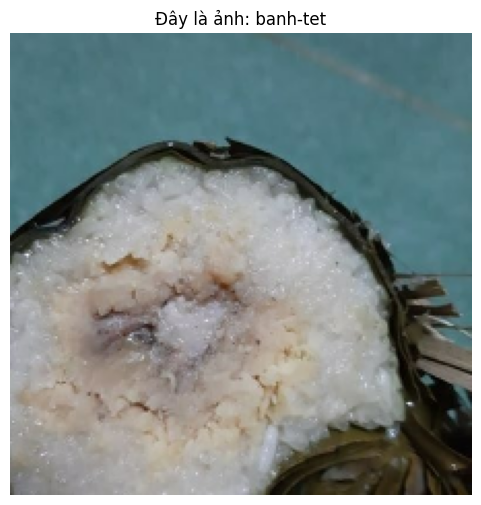

In [ ]:
import matplotlib.pyplot as plt

# Lấy một batch (gồm 32 ảnh và nhãn) từ bộ dữ liệu
# .take(1) có nghĩa là chỉ lấy 1 batch
for images, labels in train_dataset.take(1):

    # Lấy ảnh đầu tiên từ batch (index 0)
    image_to_show = images[0]

    # Lấy nhãn đầu tiên (đây là vector one-hot, ví dụ: [0, 0, 1, 0, ...])
    label_one_hot = labels[0]

    # Dùng np.argmax để tìm index của nhãn (ví dụ: 2)
    label_index = np.argmax(label_one_hot)

    # Lấy tên nhãn tương ứng từ class_names
    label_name = class_names[label_index]

    # --- Hiển thị ảnh ---
    plt.figure(figsize=(6, 6))

    # Ảnh được tải lên là kiểu float32 (0-255),
    # chúng ta chuyển về uint8 (số nguyên 0-255) để matplotlib hiển thị
    plt.imshow(image_to_show.numpy().astype("uint8"))

    plt.title(f"Đây là ảnh: {label_name}")
    plt.axis("off")
    plt.show()

In [ ]:
def build_lenet(input_shape, num_classes):
    model = models.Sequential([
        # Chuẩn hóa giá trị pixel về [0, 1]
        layers.Rescaling(1./255, input_shape=input_shape),

        # Lớp C1: Tích chập
        layers.Conv2D(6, kernel_size=(5, 5), activation='relu'),

        # Lớp S2: Gộp trung bình
        layers.AveragePooling2D(pool_size=(2, 2)),

        # Lớp C3: Tích chập
        layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),

        # Lớp S4: Gộp trung bình
        layers.AveragePooling2D(pool_size=(2, 2)),

        # Làm phẳng (Flatten)
        layers.GlobalAveragePooling2D(),
        # layers.Flatten(),

        # Lớp C5/F5: Kết nối đầy đủ
        layers.Dense(120, activation='relu'),

        # Lớp F6: Kết nối đầy đủ
        layers.Dense(84, activation='relu'),

        # Lớp Output
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Khởi tạo mô hình
input_shape = (IMG_SIZE[0], IMG_SIZE[1], 3)
model = build_lenet(input_shape, NUM_CLASSES)

# Xem tóm tắt kiến trúc
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 220, 220, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 110, 110, 6)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 106, 106, 16)   │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 53, 53, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 16)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │         2,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 21)             │         1,785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,861 (65.86 KB)

 Trainable params: 16,861 (65.86 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Biên dịch mô hình
model.compile(
    optimizer='adam',  # Sử dụng Adam optimizer
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'), # Đây là micro-precision
        tf.keras.metrics.Recall(name='recall')       # Đây là micro-recall
    ]
)

# Huấn luyện mô hình
print("\nBắt đầu huấn luyện mô hình LeNet...")
history = model.fit(
    train_dataset,
    epochs=15,  # Bạn có thể tăng/giảm số lượng epochs
    validation_data=test_dataset
)
print("Huấn luyện hoàn tất.")


Bắt đầu huấn luyện mô hình LeNet...
Epoch 1/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 89s 271ms/step - accuracy: 0.1810 - loss: 2.6329 - precision: 0.5860 - recall: 0.0093 - val_accuracy: 0.1717 - val_loss: 2.6799 - val_precision: 0.5556 - val_recall: 0.0045
Epoch 2/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 84s 268ms/step - accuracy: 0.1881 - loss: 2.6042 - precision: 0.5694 - recall: 0.0099 - val_accuracy: 0.1866 - val_loss: 2.6824 - val_precision: 0.5236 - val_recall: 0.0150
Epoch 3/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 72s 231ms/step - accuracy: 0.1958 - loss: 2.5608 - precision: 0.6873 - recall: 0.0130 - val_accuracy: 0.1818 - val_loss: 2.6767 - val_precision: 0.4874 - val_recall: 0.0145
Epoch 4/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 72s 230ms/step - accuracy: 0.2078 - loss: 2.5306 - precision: 0.5856 - recall: 0.0140 - val_accuracy: 0.2172 - val_loss: 2.5845 - val_precision: 0.6787 - val_recall: 0.0224
Epoch 5/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 72s 228ms/step - accuracy: 0.2215 - loss: 2.4839 - precision: 0.6777 - 

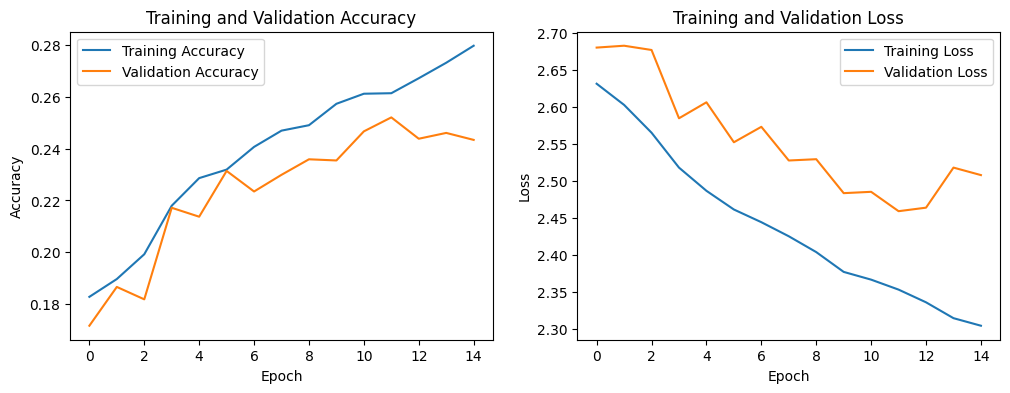

In [ ]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Vẽ biểu đồ Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
print("\nĐang đánh giá mô hình trên tập kiểm tra (test set)...")

# 1. Lấy các dự đoán (probabilities)
y_pred_probs = model.predict(test_dataset)
# Chuyển probabilities thành nhãn (lớp có xác suất cao nhất)
y_pred = np.argmax(y_pred_probs, axis=1)

# 2. Lấy các nhãn thật
y_true = []
# Lặp qua test dataset để lấy nhãn
for images, labels in test_dataset:
    y_true.extend(np.argmax(labels.numpy(), axis=1))

y_true = np.array(y_true)

# 3. Tính toán và in báo cáo
print("\n--- Báo cáo phân loại chi tiết ---")
# Sử dụng target_names để in tên lớp thay vì chỉ số
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')

print("\n--- Tổng kết các độ đo Macro-Average ---")
print(f"Precision (Macro): {precision_macro:.4f}")
print(f"Recall (Macro):    {recall_macro:.4f}")
print(f"F1-Score (Macro):  {f1_macro:.4f}")


Đang đánh giá mô hình trên tập kiểm tra (test set)...
209/209 ━━━━━━━━━━━━━━━━━━━━ 31s 144ms/step

--- Báo cáo phân loại chi tiết ---
                  precision    recall  f1-score   support

        banh-can       0.14      0.05      0.07       241
        banh-hoi       0.19      0.68      0.30       607
    banh-mi-chao       0.44      0.17      0.25       289
        banh-tet       0.29      0.26      0.27       364
 banh-trang-tron       0.14      0.13      0.13       309
          banh-u       0.33      0.01      0.02       176
        banh-uot       0.19      0.26      0.22       560
       bap-nuong       0.57      0.03      0.05       143
          bo-kho       0.24      0.16      0.19       338
       bo-la-lot       0.33      0.41      0.37       458
       bot-chien       0.22      0.16      0.19       276
           ca-ri       0.29      0.01      0.02       171
    canh-kho-qua       0.49      0.51      0.50       290
   canh-khoai-mo       0.73      0.57      0.64     

**GoogleLeNet**

In [ ]:
from tensorflow.keras import layers, models, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout, concatenate, GlobalAveragePooling2D

def inception_module(x, f1, f3_reduce, f3, f5_reduce, f5, f_pool_proj):
    """
    Hàm xây dựng một khối Inception
    """
    # Nhánh 1: 1x1 Conv
    branch1 = Conv2D(f1, (1, 1), padding='same', activation='relu')(x)

    # Nhánh 2: 1x1 Conv -> 3x3 Conv
    branch2 = Conv2D(f3_reduce, (1, 1), padding='same', activation='relu')(x)
    branch2 = Conv2D(f3, (3, 3), padding='same', activation='relu')(branch2)

    # Nhánh 3: 1x1 Conv -> 5x5 Conv
    branch3 = Conv2D(f5_reduce, (1, 1), padding='same', activation='relu')(x)
    branch3 = Conv2D(f5, (5, 5), padding='same', activation='relu')(branch3)

    # Nhánh 4: 3x3 Max Pooling -> 1x1 Conv
    branch4 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch4 = Conv2D(f_pool_proj, (1, 1), padding='same', activation='relu')(branch4)

    # Ghép các nhánh lại với nhau
    output = concatenate([branch1, branch2, branch3, branch4], axis=3)

    return output

def build_googlenet(input_shape, num_classes):
    """
    Hàm xây dựng mô hình GoogleLeNet (Inception v1)
    """
    input_tensor = Input(shape=input_shape)

    x = layers.Rescaling(1./255)(input_tensor)

    # --- Stem (Thân) ---
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = Conv2D(64, (1, 1), padding='same', activation='relu')(x)
    x = Conv2D(192, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # --- Khối Inception (3) ---
    x = inception_module(x, f1=64, f3_reduce=96, f3=128, f5_reduce=16, f5=32, f_pool_proj=32) # Inception 3a
    x = inception_module(x, f1=128, f3_reduce=128, f3=192, f5_reduce=32, f5=96, f_pool_proj=64) # Inception 3b
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # --- Khối Inception (4) ---
    x = inception_module(x, f1=192, f3_reduce=96, f3=208, f5_reduce=16, f5=48, f_pool_proj=64)   # Inception 4a
    x = inception_module(x, f1=160, f3_reduce=112, f3=224, f5_reduce=24, f5=64, f_pool_proj=64)  # Inception 4b
    x = inception_module(x, f1=128, f3_reduce=128, f3=256, f5_reduce=24, f5=64, f_pool_proj=64)  # Inception 4c
    x = inception_module(x, f1=112, f3_reduce=144, f3=288, f5_reduce=32, f5=64, f_pool_proj=64)  # Inception 4d
    x = inception_module(x, f1=256, f3_reduce=160, f3=320, f5_reduce=32, f5=128, f_pool_proj=128) # Inception 4e
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # --- Khối Inception (5) ---
    x = inception_module(x, f1=256, f3_reduce=160, f3=320, f5_reduce=32, f5=128, f_pool_proj=128) # Inception 5a
    x = inception_module(x, f1=384, f3_reduce=192, f3=384, f5_reduce=48, f5=128, f_pool_proj=128) # Inception 5b

    # --- Đầu ra (Classifier) ---
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.4)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=input_tensor, outputs=output, name='GoogleLeNet')

    return model

In [ ]:
# Khởi tạo mô hình
input_shape = (IMG_SIZE[0], IMG_SIZE[1], 3)
model_googlenet = build_googlenet(input_shape, NUM_CLASSES)

# In tóm tắt để xem kiến trúc
model_googlenet.summary()

# Biên dịch mô hình với Adam
model_googlenet.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

# --- HUẤN LUYỆN MÔ HÌNH ---
print("\nBắt đầu huấn luyện mô hình GoogleLeNet...")
print("⚠️ LƯU Ý: Quá trình này sẽ mất RẤT NHIỀU thời gian trên Colab!")

history_googlenet = model_googlenet.fit(
    train_dataset,
    epochs=15,  # Bắt đầu với 15-20 epochs
    validation_data=test_dataset
)

print("Huấn luyện GoogleLeNet hoàn tất.")

Model: "GoogleLeNet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 112, 112,  │      9,472 │ rescaling_1[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 56, 56,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 56, 56,    │      4,160 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 56, 56,    │    110,784 │ conv2d_3[0][0]    │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 28, 28,    │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 28, 28,    │     18,528 │ max_pooling2d_1[… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 28, 28,    │      3,088 │ max_pooling2d_1[… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 28, 28,    │          0 │ max_pooling2d_1[… │
│ (MaxPooling2D)      │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 28, 28,    │     12,352 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 28, 28,    │    110,720 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 28, 28,    │     12,832 │ conv2d_8[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 28, 28,    │      6,176 │ max_pooling2d_2[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 28, 28,    │          0 │ conv2d_5[0][0],   │
│ (Concatenate)       │ 256)              │            │ conv2d_7[0][0],   │
│                     │                   │            │ conv2d_9[0][0],   │
│                     │                   │            │ conv2d_10[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 28, 28,    │     32,896 │ concatenate[0][0] │
│                     │ 128)              │            │                 

 Total params: 5,995,077 (22.87 MB)

 Trainable params: 5,995,077 (22.87 MB)

 Non-trainable params: 0 (0.00 B)


Bắt đầu huấn luyện mô hình GoogleLeNet...
⚠️ LƯU Ý: Quá trình này sẽ mất RẤT NHIỀU thời gian trên Colab!
Epoch 1/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 160s 373ms/step - accuracy: 0.0791 - loss: 3.0047 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0908 - val_loss: 2.9765 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 78s 249ms/step - accuracy: 0.0894 - loss: 2.9770 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0908 - val_loss: 2.9756 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 78s 248ms/step - accuracy: 0.0869 - loss: 2.9767 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0908 - val_loss: 2.9757 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 78s 247ms/step - accuracy: 0.0880 - loss: 2.9758 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0908 - val_loss: 2.9756 - val_precision: 0.0000e+00 - 

In [ ]:
print("\nĐang đánh giá mô hình GoogleLeNet trên tập kiểm tra...")

# 1. Lấy các dự đoán
y_pred_probs = model_googlenet.predict(test_dataset)
y_pred = np.argmax(y_pred_probs, axis=1)

# 2. Lấy các nhãn thật
y_true = []
for images, labels in test_dataset:
    y_true.extend(np.argmax(labels.numpy(), axis=1))
y_true = np.array(y_true)

# 3. Tính toán và in báo cáo
print("\n--- Báo cáo phân loại chi tiết (GoogleLeNet) ---")
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

# In các chỉ số macro-average riêng lẻ
precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')

print("\n--- Tổng kết các độ đo Macro-Average (GoogleLeNet) ---")
print(f"Precision (Macro): {precision_macro:.4f}")
print(f"Recall (Macro):    {recall_macro:.4f}")
print(f"F1-Score (Macro):  {f1_macro:.4f}")


Đang đánh giá mô hình GoogleLeNet trên tập kiểm tra...
209/209 ━━━━━━━━━━━━━━━━━━━━ 37s 161ms/step

--- Báo cáo phân loại chi tiết (GoogleLeNet) ---
                  precision    recall  f1-score   support

        banh-can       0.00      0.00      0.00       241
        banh-hoi       0.09      1.00      0.17       607
    banh-mi-chao       0.00      0.00      0.00       289
        banh-tet       0.00      0.00      0.00       364
 banh-trang-tron       0.00      0.00      0.00       309
          banh-u       0.00      0.00      0.00       176
        banh-uot       0.00      0.00      0.00       560
       bap-nuong       0.00      0.00      0.00       143
          bo-kho       0.00      0.00      0.00       338
       bo-la-lot       0.00      0.00      0.00       458
       bot-chien       0.00      0.00      0.00       276
           ca-ri       0.00      0.00      0.00       171
    canh-kho-qua       0.00      0.00      0.00       290
   canh-khoai-mo       0.00      0.00

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

### Bài 3*: Xây dựng mô hình ResNet-18, đánh giá mô hình ResNet-18 trên bộ dữ liệu VinaFood21 sử dụng các độ đo precision, recall, và F1 (Sử dụng Adam làm optimizer).


In [8]:
base_dir = 'VinaFood21'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 21

train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir, image_size=IMG_SIZE, batch_size=BATCH_SIZE,
    label_mode='categorical', shuffle=True
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir, image_size=IMG_SIZE, batch_size=BATCH_SIZE,
    label_mode='categorical', shuffle=False
)

class_names = train_dataset.class_names

print("Tải dữ liệu hoàn tất.")


Found 10044 files belonging to 21 classes.
Found 6682 files belonging to 21 classes.
Tải dữ liệu hoàn tất.


In [10]:
def basic_block(x, filters, strides=1):

    # Resnet block
    # Main:
    f_x = Conv2D(filters, (3, 3), strides=strides, padding='same')(x)
    f_x = BatchNormalization()(f_x)
    f_x = ReLU()(f_x)

    f_x = Conv2D(filters, (3, 3), strides=1, padding='same')(f_x)
    f_x = BatchNormalization()(f_x)

    # Shortcut
    shortcut = x
    if strides != 1 or x.shape[-1] != filters:
        shortcut = Conv2D(filters, (1, 1), strides=strides, padding='same')(x)
        shortcut = BatchNormalization()(shortcut)

    x_out = Add()([f_x, shortcut])
    x_out = ReLU()(x_out) # Áp dụng ReLU sau khi cộng

    return x_out

def build_custom_resnet(input_shape, num_classes):
    # Hàm xây dựng kiến trúc ResNet theo ảnh đã cho:
    input_tensor = Input(shape=input_shape)

    # Chuẩn hóa
    x = layers.Rescaling(1./255)(input_tensor)

    # 7x7 Conv & 3x3 MaxPool
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Lặp 2 lần block, giữ nguyên kích thước (strides=1)
    x = basic_block(x, filters=64, strides=1)
    x = basic_block(x, filters=64, strides=1)

    # Lặp 3 lần block,
    # Khối đầu tiên dùng strides=2 để giảm kích thước (và dùng 1x1 Conv ở shortcut)
    x = basic_block(x, filters=128, strides=2)
    x = basic_block(x, filters=128, strides=1)
    x = basic_block(x, filters=128, strides=1)

    x = GlobalAveragePooling2D()(x) # Global AvePool
    output = Dense(num_classes, activation='softmax')(x) # FC Layer

    model = models.Model(inputs=input_tensor, outputs=output, name='Custom_ResNet')
    return model

In [11]:
input_shape = (IMG_SIZE[0], IMG_SIZE[1], 3)
model_custom_resnet = build_custom_resnet(input_shape, NUM_CLASSES)

model_custom_resnet.summary()

model_custom_resnet.compile(
    optimizer='adam', # ADAM
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

print("\nBắt đầu huấn luyện mô hình ResNet theo hình...")

history_custom_resnet = model_custom_resnet.fit(
    train_dataset,
    epochs=15,
    validation_data=test_dataset
)

print("Huấn luyện ResNet tùy chỉnh hoàn tất.")

Model: "Custom_ResNet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 112, 112,  │      9,472 │ rescaling[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 112, 112,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 112, 112,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 56, 56,    │          0 │ re_lu[0][0]       │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 56, 56,    │     36,928 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 56, 56,    │     36,928 │ re_lu_1[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 56, 56,    │          0 │ add[0][0]         │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 56, 56,    │     36,928 │ re_lu_2[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 56, 56,    │     36,928 │ re_lu_3[0][0]   

 Total params: 984,853 (3.76 MB)

 Trainable params: 982,421 (3.75 MB)

 Non-trainable params: 2,432 (9.50 KB)


Bắt đầu huấn luyện mô hình ResNet TÙY CHỈNH (theo hình)...
Epoch 1/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 119s 319ms/step - accuracy: 0.1876 - loss: 2.7768 - precision: 0.4511 - recall: 0.0299 - val_accuracy: 0.0991 - val_loss: 3.3332 - val_precision: 0.2798 - val_recall: 0.0214
Epoch 2/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 87s 278ms/step - accuracy: 0.3072 - loss: 2.2658 - precision: 0.6237 - recall: 0.0828 - val_accuracy: 0.1295 - val_loss: 4.2517 - val_precision: 0.1905 - val_recall: 0.0763
Epoch 3/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 79s 252ms/step - accuracy: 0.3570 - loss: 2.0842 - precision: 0.6403 - recall: 0.1220 - val_accuracy: 0.2586 - val_loss: 2.9511 - val_precision: 0.3699 - val_recall: 0.1717
Epoch 4/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 84s 258ms/step - accuracy: 0.4071 - loss: 1.9343 - precision: 0.6517 - recall: 0.1658 - val_accuracy: 0.2737 - val_loss: 2.7204 - val_precision: 0.4185 - val_recall: 0.1690
Epoch 5/15
314/314 ━━━━━━━━━━━━━━━━━━━━ 82s 257ms/step - accuracy: 0.4455 - loss: 1.802

In [12]:
y_pred_probs = model_custom_resnet.predict(test_dataset)
y_pred = np.argmax(y_pred_probs, axis=1)

y_true = []
for images, labels in test_dataset:
    y_true.extend(np.argmax(labels.numpy(), axis=1))
y_true = np.array(y_true)

print("\n--- Báo cáo phân loại chi tiết ---")
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

# In các chỉ số macro-average riêng lẻ
precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')

print("\n--- Tổng kết Macro-Average (ResNet) ---")
print(f"Precision (Macro): {precision_macro:.4f}")
print(f"Recall (Macro):    {recall_macro:.4f}")
print(f"F1-Score (Macro):  {f1_macro:.4f}")


Đang đánh giá mô hình ResNet TÙY CHỈNH trên tập kiểm tra...
209/209 ━━━━━━━━━━━━━━━━━━━━ 35s 154ms/step

--- Báo cáo phân loại chi tiết (ResNet Tùy Chỉnh) ---
                  precision    recall  f1-score   support

        banh-can       0.53      0.07      0.12       241
        banh-hoi       0.86      0.16      0.28       607
    banh-mi-chao       0.47      0.31      0.37       289
        banh-tet       1.00      0.00      0.01       364
 banh-trang-tron       0.31      0.39      0.35       309
          banh-u       0.38      0.44      0.41       176
        banh-uot       0.44      0.33      0.38       560
       bap-nuong       0.18      0.41      0.25       143
          bo-kho       0.12      0.90      0.22       338
       bo-la-lot       0.53      0.76      0.63       458
       bot-chien       0.40      0.43      0.41       276
           ca-ri       0.30      0.16      0.21       171
    canh-kho-qua       0.80      0.53      0.63       290
   canh-khoai-mo       0.57

### Bài 4*: Sử dụng pretrained ResNet50 từ HuggingFace để fine-tune trên bộ dữ liệu VinaFood21.

In [13]:
!pip install transformers datasets scikit-learn

In [14]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from transformers import ResNetForImageClassification
from PIL import Image

In [15]:
base_dir = 'VinaFood21'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

IMG_SIZE = 224
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

train_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(), # Augmentation
    transforms.ToTensor(),             # Chuyển ảnh PIL sang Tensor
    normalize,
])

test_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    normalize,
])

train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=test_transforms)

class_names = train_dataset.classes
NUM_CLASSES = len(class_names)
print(f"Số lớp: {NUM_CLASSES}, Tên lớp: {class_names}")

# DataLoaders
BATCH_SIZE = 32

train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,  # Xáo trộn dữ liệu huấn luyện
    num_workers=2  # Tăng tốc độ tải dữ liệu
)

test_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False, # Không xáo trộn
    num_workers=2
)

Số lớp: 21, Tên lớp: ['banh-can', 'banh-hoi', 'banh-mi-chao', 'banh-tet', 'banh-trang-tron', 'banh-u', 'banh-uot', 'bap-nuong', 'bo-kho', 'bo-la-lot', 'bot-chien', 'ca-ri', 'canh-kho-qua', 'canh-khoai-mo', 'ga-nuong', 'goi-ga', 'ha-cao', 'hoanh-thanh-nuoc', 'pha-lau', 'tau-hu', 'thit-kho-trung']


In [16]:
class PretrainedResnet(nn.Module):
    def __init__(self, num_labels=21):
        super().__init__()

        # Tải mô hình ResNet-50 gốc
        basemodel = ResNetForImageClassification.from_pretrained("microsoft/resnet-50")

        # Giữ lại phần thân (feature extractor)
        self.resnet = basemodel.resnet

        # Thay thế lớp classifier
        # ResNet-50 có 2048 features ở pooler output
        self.classifier = nn.Linear(in_features=2048, out_features=num_labels, bias=True)

    def forward(self, images: torch.Tensor):
        # images có shape (batch_size, 3, 224, 224)

        # 1. Đưa qua ResNet (self.resnet là một ResNetModel)
        # pooler_output có shape (batch_size, 2048, 1, 1)
        features = self.resnet(images).pooler_output

        # 2. Ép (squeeze) 2 chiều cuối cùng 1x1
        # features shape -> (batch_size, 2048)
        features = features.squeeze(-1).squeeze(-1)

        # 3. Đưa qua lớp classifier mới
        # logits shape -> (batch_size, 21)
        logits = self.classifier(features)

        return logits

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Đang sử dụng thiết bị: {device}")

model = PretrainedResnet(num_labels=NUM_CLASSES).to(device)

# Adam
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4) # Learning rate nhỏ cho fine-tuning
criterion = nn.CrossEntropyLoss() # Dùng cho bài toán phân loại đa lớp

Đang sử dụng thiết bị: cuda


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

In [18]:
NUM_EPOCHS = 5

for epoch in range(NUM_EPOCHS):
    print(f"\n--- Epoch {epoch + 1}/{NUM_EPOCHS} ---")

    model.train()

    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        running_loss += loss.item()
        if (i + 1) % 100 == 0: # In loss sau mỗi 100 batch
            print(f"  [Batch {i + 1}/{len(train_loader)}] Training Loss: {loss.item():.4f}")

    print(f"Epoch {epoch + 1} Training Loss: {running_loss / len(train_loader):.4f}")


--- Epoch 1/5 ---
  [Batch 100/314] Training Loss: 2.8321
  [Batch 200/314] Training Loss: 2.4848
  [Batch 300/314] Training Loss: 2.0875
Epoch 1 Training Loss: 2.6597

--- Epoch 2/5 ---
  [Batch 100/314] Training Loss: 1.7363
  [Batch 200/314] Training Loss: 1.0607
  [Batch 300/314] Training Loss: 1.0262
Epoch 2 Training Loss: 1.3516

--- Epoch 3/5 ---
  [Batch 100/314] Training Loss: 0.8739
  [Batch 200/314] Training Loss: 0.8526
  [Batch 300/314] Training Loss: 0.5289
Epoch 3 Training Loss: 0.7156

--- Epoch 4/5 ---
  [Batch 100/314] Training Loss: 0.6092
  [Batch 200/314] Training Loss: 0.4822
  [Batch 300/314] Training Loss: 0.4297
Epoch 4 Training Loss: 0.4808

--- Epoch 5/5 ---
  [Batch 100/314] Training Loss: 0.2985
  [Batch 200/314] Training Loss: 0.3397
  [Batch 300/314] Training Loss: 0.4523
Epoch 5 Training Loss: 0.3405


In [19]:
print("\nĐang đánh giá mô hình trên tập test...")

model.eval()

all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)

        _, predicted = torch.max(outputs, 1)


        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

print("\n--- Báo cáo phân loại chi tiết (ResNet-50 Fine-tuned) ---")
report = classification_report(all_labels, all_preds, target_names=class_names)
print(report)

precision_macro = precision_score(all_labels, all_preds, average='macro')
recall_macro = recall_score(all_labels, all_preds, average='macro')
f1_macro = f1_score(all_labels, all_preds, average='macro')

print("\n--- Tổng kết Macro-Average ---")
print(f"Precision (Macro): {precision_macro:.4f}")
print(f"Recall (Macro):    {recall_macro:.4f}")
print(f"F1-Score (Macro):  {f1_macro:.4f}")


Đang đánh giá mô hình trên tập test...

--- Báo cáo phân loại chi tiết (ResNet-50 Fine-tuned) ---
                  precision    recall  f1-score   support

        banh-can       0.84      0.89      0.87       241
        banh-hoi       0.80      0.88      0.84       607
    banh-mi-chao       0.91      0.92      0.91       289
        banh-tet       0.94      0.80      0.87       364
 banh-trang-tron       0.91      0.83      0.87       309
          banh-u       0.78      0.89      0.83       176
        banh-uot       0.81      0.73      0.77       560
       bap-nuong       0.98      0.94      0.96       143
          bo-kho       0.74      0.77      0.75       338
       bo-la-lot       0.85      0.93      0.89       458
       bot-chien       0.75      0.86      0.80       276
           ca-ri       0.57      0.36      0.44       171
    canh-kho-qua       0.90      0.94      0.92       290
   canh-khoai-mo       0.97      0.88      0.93       198
        ga-nuong       0.83   